# Analyzing Video Game Sales, by Andy Qu and Evan Song

Tutorial by Andy Qu and Evan Song

# Why analyze Video Game Sales?
PLACEHOLDER


Will analyze Video Games and how the Publisher and the number of Games Produced by the Publisher affects the quality and reception of the games made.

# Gathering Data

PLACEHOLDER

Uses Video Game Data from Kaggle: https://www.kaggle.com/ashaheedq/video-games-sales-2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns; sns.set_theme()

df = pd.read_csv('vgsales-12-4-2019.csv')
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


Description of columns
- Rank
- Name
- Genre
- ESRB_Rating
- Platform
- Publisher

In [2]:
# Relationship between Publisher and sales/shipped

# Exploratory Data Analysis
PLACEHOLDER

Remove all rows that have no sale information since this dataset analyzes sales.

Create new columns for total sales per publisher, average sale per game for publisher, and how many games a publisher has published.

In [3]:
# Because sales are either listed under "Total_Shipped" or "Global_Sales", 
# Total_Sales will keep the total value in one column. Records by Millions.
# Then removes games with no sales data whatsoever.
df['Total_Sales'] = df.Total_Shipped.fillna(0) + df.Global_Sales.fillna(0)
df = df[df.Total_Sales != 0]


In [4]:
>>> df["Publisher_Sales"] = df.groupby(["Publisher"])["Total_Sales"].transform(sum)
df = df.sort_values(by=['Publisher_Sales', 'Total_Sales'], ascending=False)

In [5]:
# number of games made, including repeats across platforms. 
# Used to divide by Publisher sales to see average sales per game
games_per_publisher = df['Publisher'].value_counts().to_dict()

In [6]:
df['Games_Produced'] = df.groupby(['Publisher'])['Publisher_Sales'].transform('count')
df['Avg_Sale'] = df.Publisher_Sales / df.Games_Produced
# df['Avg_Sale'] = 0
# df['Games_Produced'] = 0

# for index, row in df.iterrows():
#     sales = row['Publisher_Sales']
#     games = games_per_publisher[row['Publisher']]
#     avg = sales/games
    
#     df.loc[index, 'Games_Produced'] = games
#     df.loc[index, 'Avg_Sale'] = avg

# FOR ANDY BELOW
HEATMAPS of the cleaned data below.

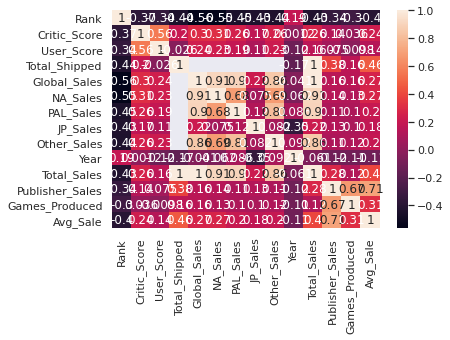

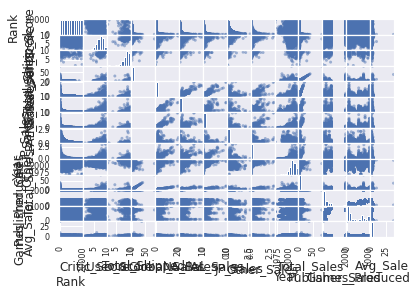

In [17]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()
scatter_matrix(df)
plt.show()

# Measuring sales by Games Produced per Publisher


Currently predicted to have little to no correlation. However maybe something to test is year as an independent variable? A lot of indie developers who only develop one or two super successful games have risen in recent years.

In [8]:
# Remove PUBG and Nintendo because they're extreme outliers
# PUBG has a too high avg_sale value, Nintendo too high games produced value
pubavg_df = df
pubavg_df = df[df.Name != "PlayerUnknown's Battlegrounds"]
# pubavg_df = pubavg_df[pubavg_df.Publisher != 'Nintendo']
pubavg_df = pubavg_df.sort_values(by=['Avg_Sale', 'Total_Sales'], ascending=False)
pubavg_df = pubavg_df.drop_duplicates(subset='Publisher', keep="last")
# pubavg_df.head(40)

In [9]:
X = pubavg_df.head(50)['Publisher']
Y1 = pubavg_df.head(50)['Avg_Sale']
Y2 = pubavg_df.head(50)['Games_Produced']

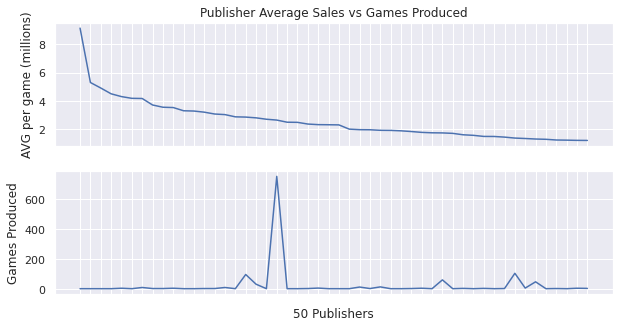

In [10]:
fig, axes = plt.subplots(2, figsize=(10, 5), sharex = True)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax1.set_ylabel("AVG per game (millions)")
ax2.set_ylabel("Games Produced")
ax2.set_xlabel("50 Publishers")
ax1.set_xticklabels("")
ax2.set_xticklabels("")
ax1.plot(X, Y1)
ax2.plot(X, Y2)
ax1.set_title("Publisher Average Sales vs Games Produced")

plt.show()


In [11]:
pubavg_pivot = pubavg_df.pivot("Publisher", "Games_Produced", "Avg_Sale")

In [12]:
pubavg_pivot.head()

Games_Produced,1,2,3,4,5,6,7,8,9,10,...,534,626,631,711,718,753,767,822,949,1027
Publisher,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,NaN,NaN,0.160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11 bit studios,NaN,NaN,0.063333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1C Company,NaN,NaN,NaN,NaN,0.050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20th Century Fox Video Games,NaN,NaN,NaN,NaN,0.388,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2K Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# FOR ANDY BELOW
"HEATMAPS" with a severe lack of data. Would probably be better off as Scatter plots imho.

BASED OFF OF the pivot info directly above, 'pubavg_pivot'

<AxesSubplot:xlabel='Games_Produced', ylabel='Publisher'>

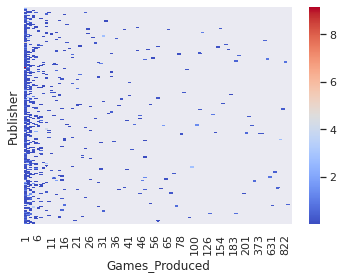

In [13]:
mask = np.zeros_like(pubavg_pivot)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pubavg_pivot, cmap="coolwarm", yticklabels=False, mask=mask)

<AxesSubplot:xlabel='Games_Produced', ylabel='Publisher'>

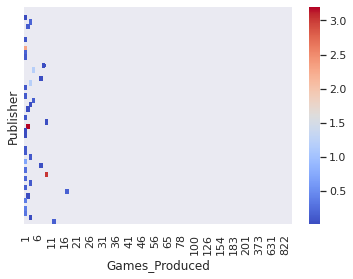

In [14]:
sample = pubavg_pivot.sample(n=50)
mask = np.zeros_like(sample)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(sample, cmap="coolwarm", yticklabels=False, mask=mask)

# FOR ANDY BELOW
Scatter plot that shows a LACK of correlation?

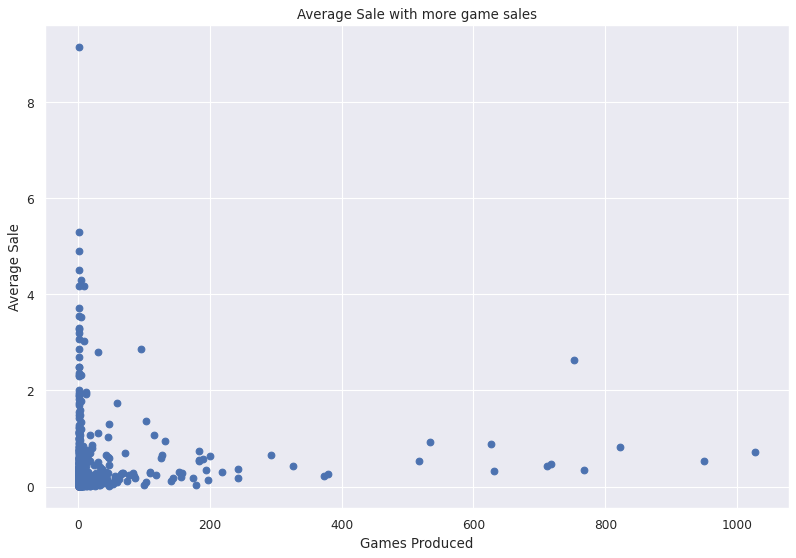

In [19]:
x_scatter = pubavg_df["Games_Produced"]
y_scatter = pubavg_df["Avg_Sale"]
plt.figure(figsize=(12, 8), dpi=80) 
plt.xlabel("Games Produced")
plt.ylabel("Average Sale")
plt.title("Average Sale with more game sales") 
plt.scatter(x_scatter, y_scatter)